In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

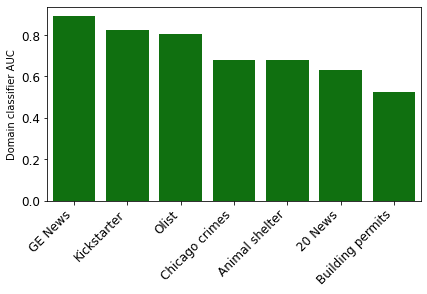

In [28]:
df = pd.DataFrame()

df['delta_auc'] =  np.array([0.014,
                             0.017,
                             0.006,
                             0.000,
                             0.000,
                            -0.003,
                            -0.004])

df['delta_auc_test'] =  np.array([-0.004, 
                                 -.040,
                                  -0.039, 
                                 -0.002,
                                 -0.023,
                                 -0.005,
                                 -0.002])

df['domain_auc'] = [0.825, ## Kickstarter
                    0.892, ## Ge News
                    0.632, ## 20 news
                    0.678, ## Animal Shelter 
                    0.803, ## Olist
                    0.679, ## Chicago
                    0.525] ## Building permits


df['dataset'] = ['Kickstarter',
                 'GE News',
                 '20 News',
                 'Animal shelter',
                 'Olist', 
                 'Chicago crimes',
                 'Building permits']

df.sort_values(by='domain_auc', inplace=True, ascending=False)

ax = sns.barplot(x='dataset', y='domain_auc', data=df, color='green')
ax.set(xlabel='', ylabel='Domain classifier AUC')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.savefig("../images/domain_classifier_performance_bars.eps", format="eps")

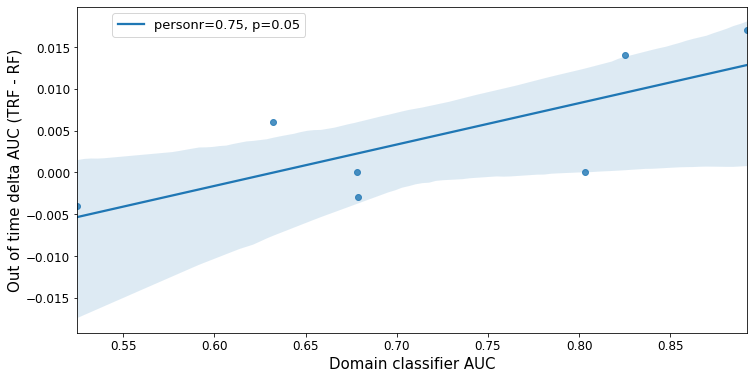

In [32]:
from matplotlib.collections import PolyCollection as p

r, p = sp.stats.pearsonr(df['domain_auc'], df['delta_auc'])

fig, ax = plt.subplots(figsize=(12, 6))
g = sns.regplot(x="domain_auc", y="delta_auc", data=df, 
               line_kws={'label':"personr={0:.2f}, p={1:.2f}".format(r, p)})

plt.xlabel("Domain classifier AUC", fontsize=15)
plt.ylabel("Out of time delta AUC (TRF - RF)", fontsize=15)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(fontsize=13, bbox_to_anchor=(0.35, 1.0))


__file__ = "../images/domain_classifier_regression"
plt.savefig(__file__+".jpg", pil_kwargs={'quality': 95}, bbox_inches="tight")

ax.set_rasterized(True)
plt.savefig(__file__ + ".eps", format="eps", bbox_inches="tight")
plt.show()

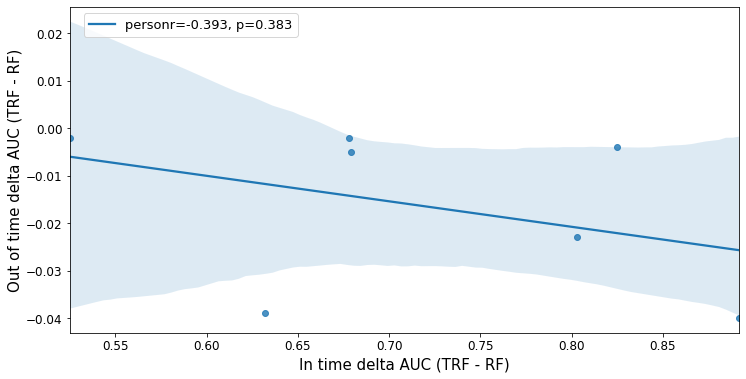

In [31]:
from matplotlib.collections import PolyCollection as p

r, p = sp.stats.pearsonr(df['domain_auc'], df['delta_auc_test'])

fig, ax = plt.subplots(figsize=(12, 6))
g = sns.regplot(x="domain_auc", y="delta_auc_test", data=df, 
               line_kws={'label':"personr={0:.3f}, p={1:.3f}".format(r, p)})

plt.xlabel("In time delta AUC (TRF - RF)", fontsize=15)
plt.ylabel("Out of time delta AUC (TRF - RF)", fontsize=15)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(fontsize=13, bbox_to_anchor=(0.35, 1.0))

__file__ = "../images/domain_classifier_regression_test"
plt.savefig(__file__+".jpg", pil_kwargs={'quality': 95}, bbox_inches="tight")

ax.set_rasterized(True)
plt.savefig(__file__ + ".eps", format="eps", bbox_inches="tight")
plt.show()